In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
variant_sheet_name = 'Вар4'
source_data_filename = 'Лабораторная работа 1. Варианты часть 1 (Построение вариационных рядов).xls'
data_sheet = pd.read_excel(source_data_filename, sheet_name=variant_sheet_name, header=0)

## Discrete distribution

In [519]:
discr_data = data_sheet[['X1']].copy()
df = discr_data.value_counts().reset_index().sort_values(by='X1')
df.reset_index(drop=True, inplace=True)
df['rel_freq'] = df['count'] / len(data_sheet)
df['empirical_function'] = df['rel_freq'].cumsum()
display(df)


,X1,count,rel_freq,empirical_function
0,1,1,0.02,0.02
1,2,2,0.04,0.06
2,3,6,0.12,0.18
3,4,4,0.08,0.26
4,5,10,0.20,0.46
5,6,14,0.28,0.74
6,7,4,0.08,0.82
7,8,7,0.14,0.96
8,9,1,0.02,0.98
9,13,1,0.02,1.00


'Среднее'

5.58

'Дисперсия'

4.3636

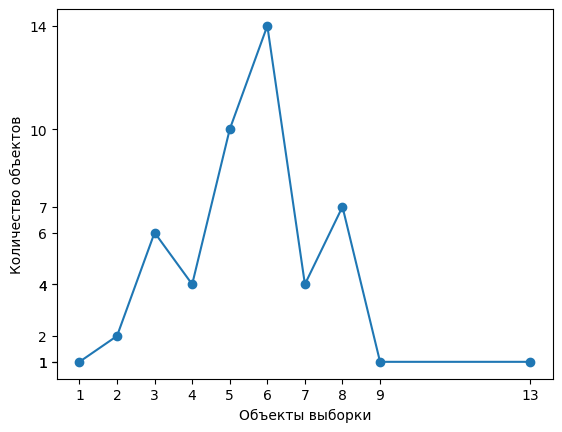

In [520]:
plt.xlabel('Объекты выборки')
plt.xticks(df['X1'])
plt.ylabel('Количество объектов')
plt.yticks(df['count'])
plt.plot(df['X1'],df['count'], marker='o')

display('Среднее', np.mean(discr_data['X1']))
display('Дисперсия', np.var(discr_data['X1']))
plt.show()

## Continious distribution

In [521]:
cont_data = data_sheet[['X2']]
ivaln = int(1 + 3.321 * np.log10(len(cont_data)))
ival_step = (max(cont_data['X2']) - min(cont_data['X2'])) / ivaln

counts, bins = np.histogram(cont_data['X2'], bins=ivaln)

(array([ 2.,  8., 18., 14.,  5.,  3.]),
 array([ 2.4958802 ,  8.19633833, 13.89679646, 19.5972546 , 25.29771273,
        30.99817086, 36.69862899]),
 <BarContainer object of 6 artists>)

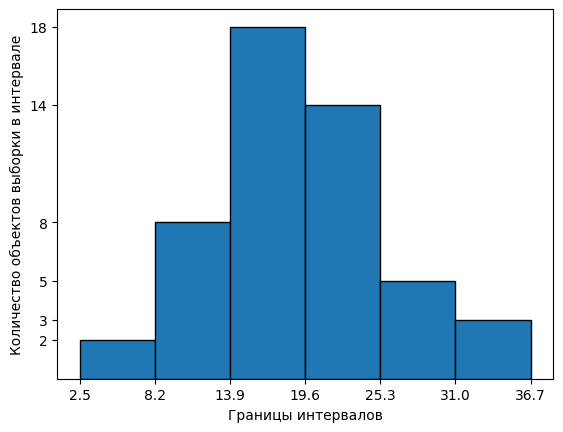

In [522]:
plt.ylabel('Количество объектов выборки в интервале')
plt.yticks(counts)
plt.xlabel('Границы интервалов')
plt.xticks(bins)

plt.hist(bins[:-1], bins, weights=counts, ec='black')